In [44]:
import numpy as np
import pandas as pd
import string
import time
import matplotlib.pyplot as plt
import random

from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec

from sklearn.manifold import TSNE 

data = pd.read_csv('BBC.csv')

In [2]:
data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [13]:
def clean_text(text ): 
    delete_dict = {sp_character: ' ' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)

    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower().split(' ')

In [32]:
new_text = data['Text'].apply(clean_text)
new_text

0       [worldcom, boss, launches, defence, lawyers, d...
1       [german, business, confidence, slides, german,...
2       [bbc, poll, indicates, economic, gloom, citize...
3       [lifestyle, governs, mobile, choice, faster, b...
4       [enron, bosses, 168m, payout, eighteen, former...
                              ...                        
1485    [double, eviction, from, big, brother, model, ...
1486    [double, act, revamp, chart, show, duo, and, j...
1487    [weak, dollar, hits, reuters, revenues, media,...
1488    [apple, ipod, family, expands, market, apple, ...
1489    [santy, worm, makes, unwelcome, visit, thousan...
Name: Text, Length: 1490, dtype: object

In [11]:
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        elif self.epoch % 100 == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
                
        self.epoch += 1
        self.loss_previous_step = loss

In [15]:
# init word2vec class
w2v_model = Word2Vec(size = 300,
                     window = 15,
                     min_count = 2,
                     workers = 20,
                     sg = 1,
                     negative = 5,
                     sample = 1e-5)
# build vovab

w2v_model.build_vocab(new_text)
  
# train the w2v model
start = time.time()
w2v_model.train(new_text, 
                total_examples=w2v_model.corpus_count, 
                epochs=1001, 
                report_delay=1,
                compute_loss = True, # set compute_loss = True
                callbacks=[callback()]) # add the callback class
end = time.time()

print("elapsedtime in seconds :"+ str(end - start))

Loss after epoch 0: 367052.5625
Loss after epoch 100: 126723.0
Loss after epoch 200: 112618.0
Loss after epoch 300: 77112.0
Loss after epoch 400: 77800.0
Loss after epoch 500: 75276.0
Loss after epoch 600: 77960.0
Loss after epoch 700: 11720.0
Loss after epoch 800: 9248.0
Loss after epoch 900: 7544.0
Loss after epoch 1000: 5184.0
elapsedtime in seconds :2628.5149738788605


In [33]:
pairs = [ 
    ('woman', 'queen'),  
    ('man', 'king')
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, w2v_model.wv.similarity(w1, w2)))

'woman'	'queen'	0.13
'man'	'king'	0.10


In [ ]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    #labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(w2v_model)

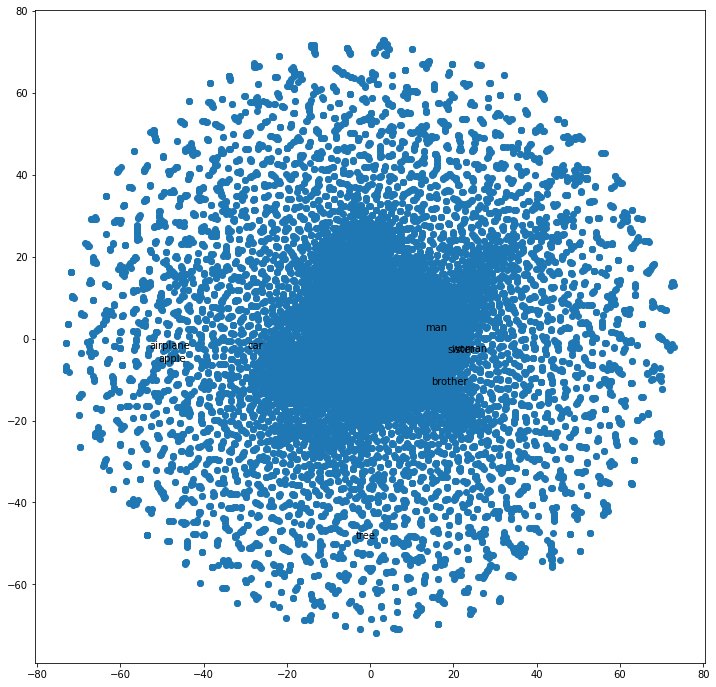

In [46]:
def plot_with_matplotlib(x_vals, y_vals, labels):

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))

    selected_indices=[]
    index = labels.index("man")
    selected_indices.append(index)
    index = labels.index("woman")
    selected_indices.append(index)
    index = labels.index("car")
    selected_indices.append(index)
    index = labels.index("airplane")
    selected_indices.append(index)    
    index = labels.index("tree") 
    selected_indices.append(index)    
    index = labels.index("apple")
    selected_indices.append(index)    
    index = labels.index("brother")
    selected_indices.append(index)
    index = labels.index("sister")
    selected_indices.append(index)

    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

plot_function = plot_with_matplotlib
plot_function(x_vals, y_vals, labels)